# Customized YOLOv5 for defect identification

Analysis & inferences are provided at the end of the file.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vjIyZVuJDb1D189od9a4")
project = rf.workspace("buyumedatasets").project("acne-new")
version = project.version(36)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to acne-new-36 in yolov5pytorch:: 100%|██████████| 6484/6484 [00:02<00:00, 2579.22it/s]


In [ ]:

!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.3/107.7 GB disk)


In [ ]:
import os
dataset_name = dataset.location.split(os.sep)[-1]


In [ ]:
os.environ["DATASET_NAME"] = dataset_name

In [ ]:
{dataset.location}

{'/content/acne-new-36'}

In [ ]:
import os
import random
import shutil
dataset_path = '/content/acne-new-36/train'
images_path = os.path.join(dataset_path, 'images')
labels_path = os.path.join(dataset_path, 'labels')
train_images_path = os.path.join(dataset_path, 'train/images')
val_images_path = os.path.join(dataset_path, 'val/images')
train_labels_path = os.path.join(dataset_path, 'train/labels')
val_labels_path = os.path.join(dataset_path, 'val/labels')
os.makedirs(train_images_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]



In [ ]:
len(image_files)

3239

In [ ]:
random.shuffle(image_files)
split_ratio = 0.8
train_size = int(len(image_files) * split_ratio)
train_files = image_files[:train_size]
val_files = image_files[train_size:]

for image_file in train_files:
    label_file = image_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
    shutil.move(os.path.join(images_path, image_file), os.path.join(train_images_path, image_file))
    shutil.move(os.path.join(labels_path, label_file), os.path.join(train_labels_path, label_file))

for image_file in val_files:
    label_file = image_file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt')
    shutil.move(os.path.join(images_path, image_file), os.path.join(val_images_path, image_file))
    shutil.move(os.path.join(labels_path, label_file), os.path.join(val_labels_path, label_file))

print(f"Dataset split completed: {len(train_files)} images for training and {len(val_files)} images for validation.")

Dataset split completed: 2591 images for training and 648 images for validation.


Pls modify the same location in the .yml file

In [ ]:
{dataset.location}

{'/content/acne-new-36'}

In [ ]:
%%time
%cd /content/yolov5/
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 5 \
  --data /content/yolov5/acne-new-36/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

/content/yolov5
2025-01-19 09:40:39.962198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-19 09:40:40.015497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-19 09:40:40.029633: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/acne-new-36/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, 

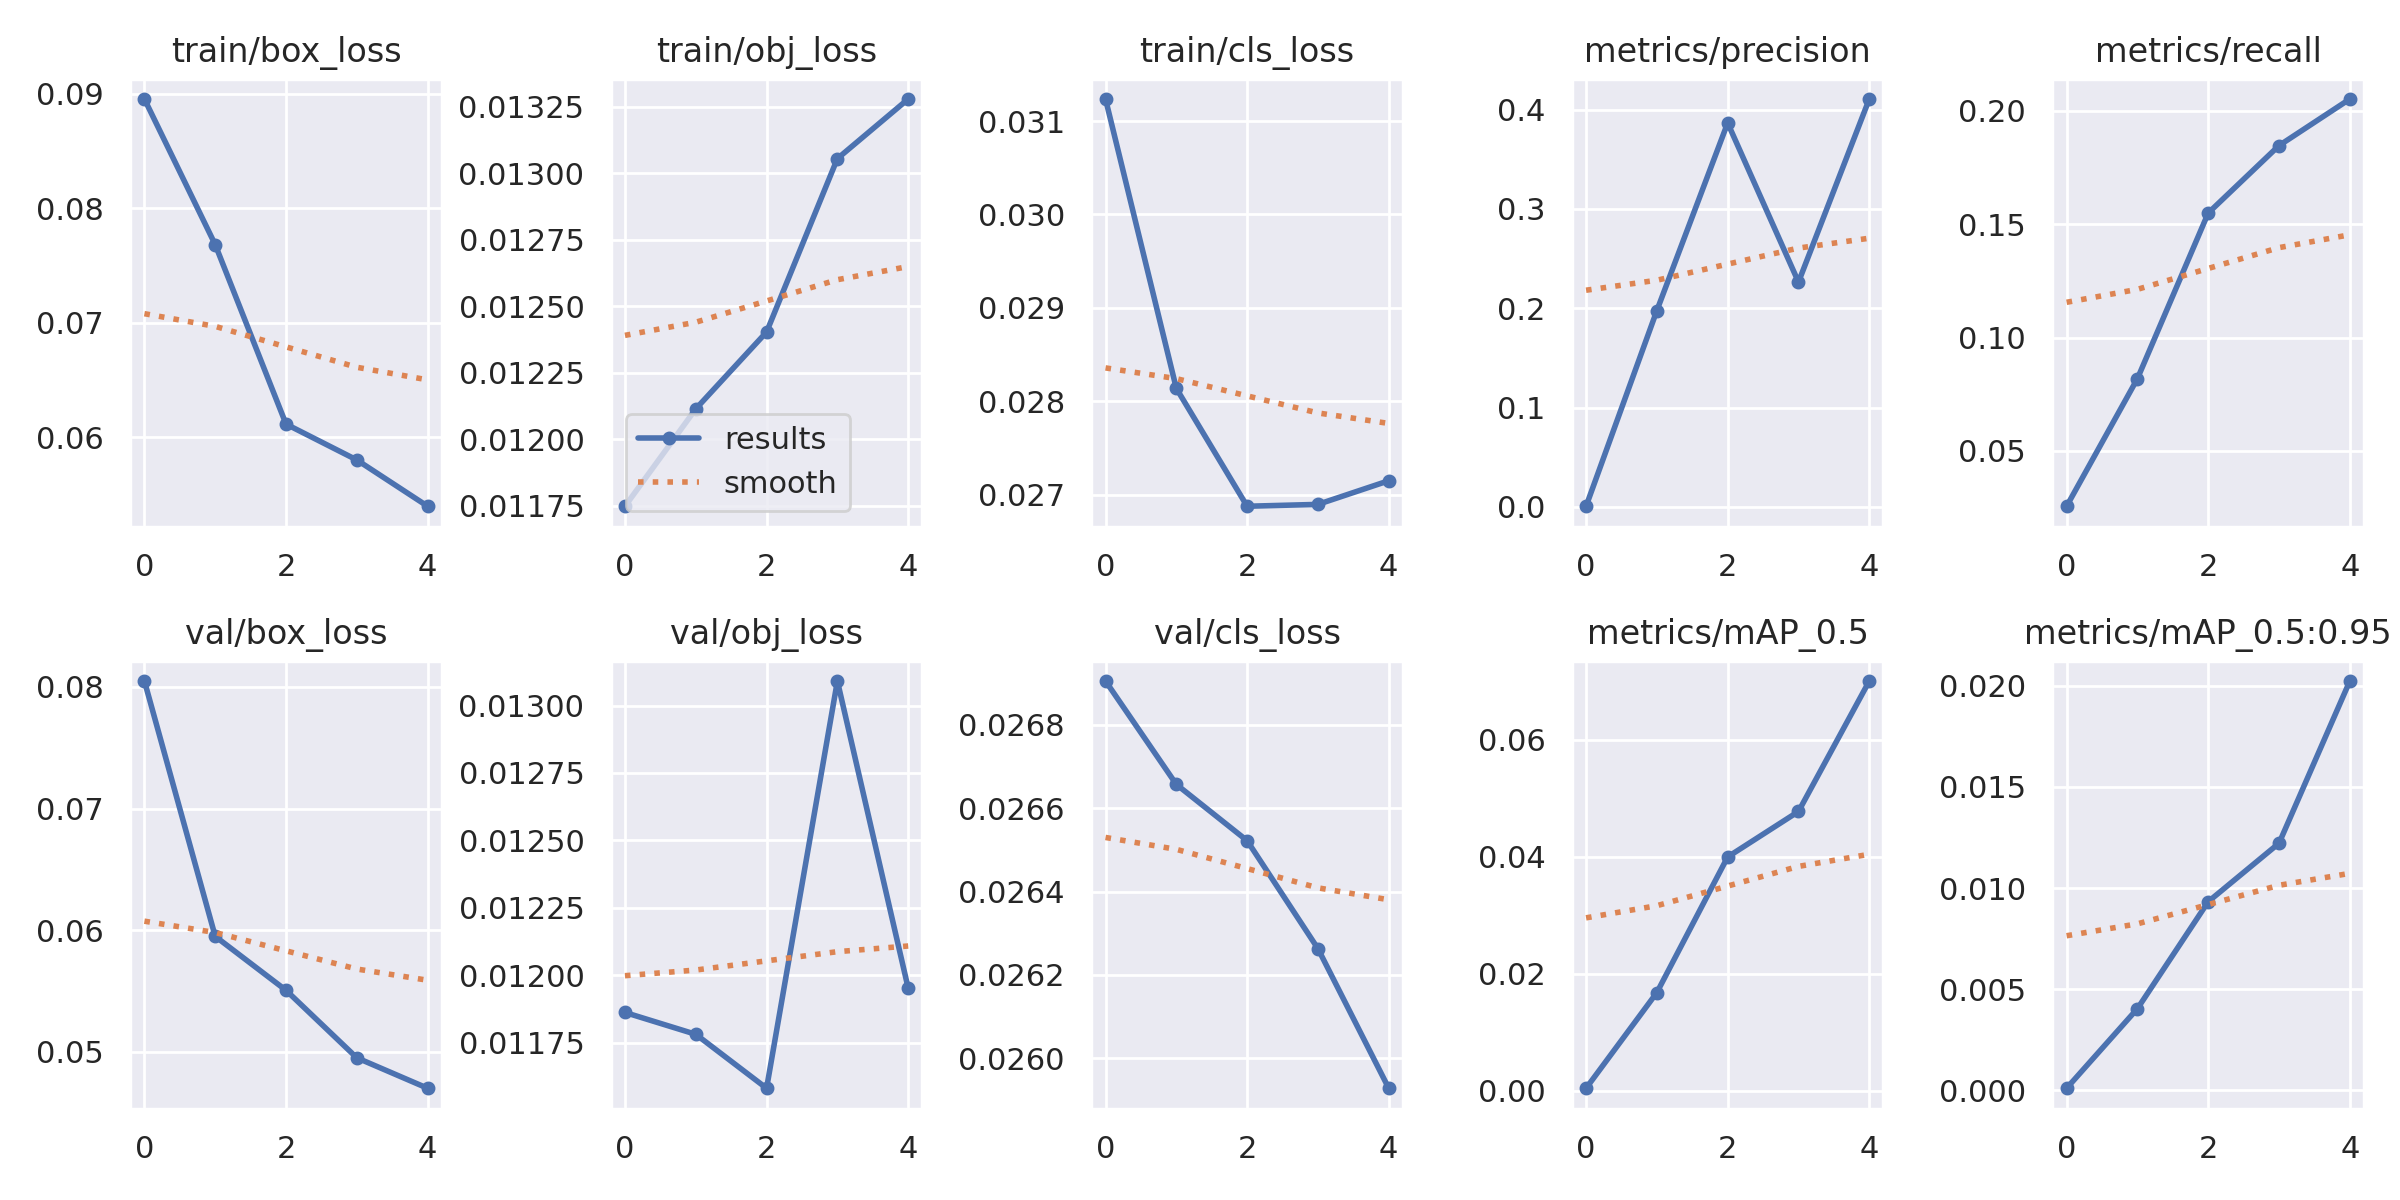

In [35]:
from IPython.display import Image,display
Image(filename='/content/yolov5/runs/train/yolov5s_results4/results.png', width=1000)

Predicted:

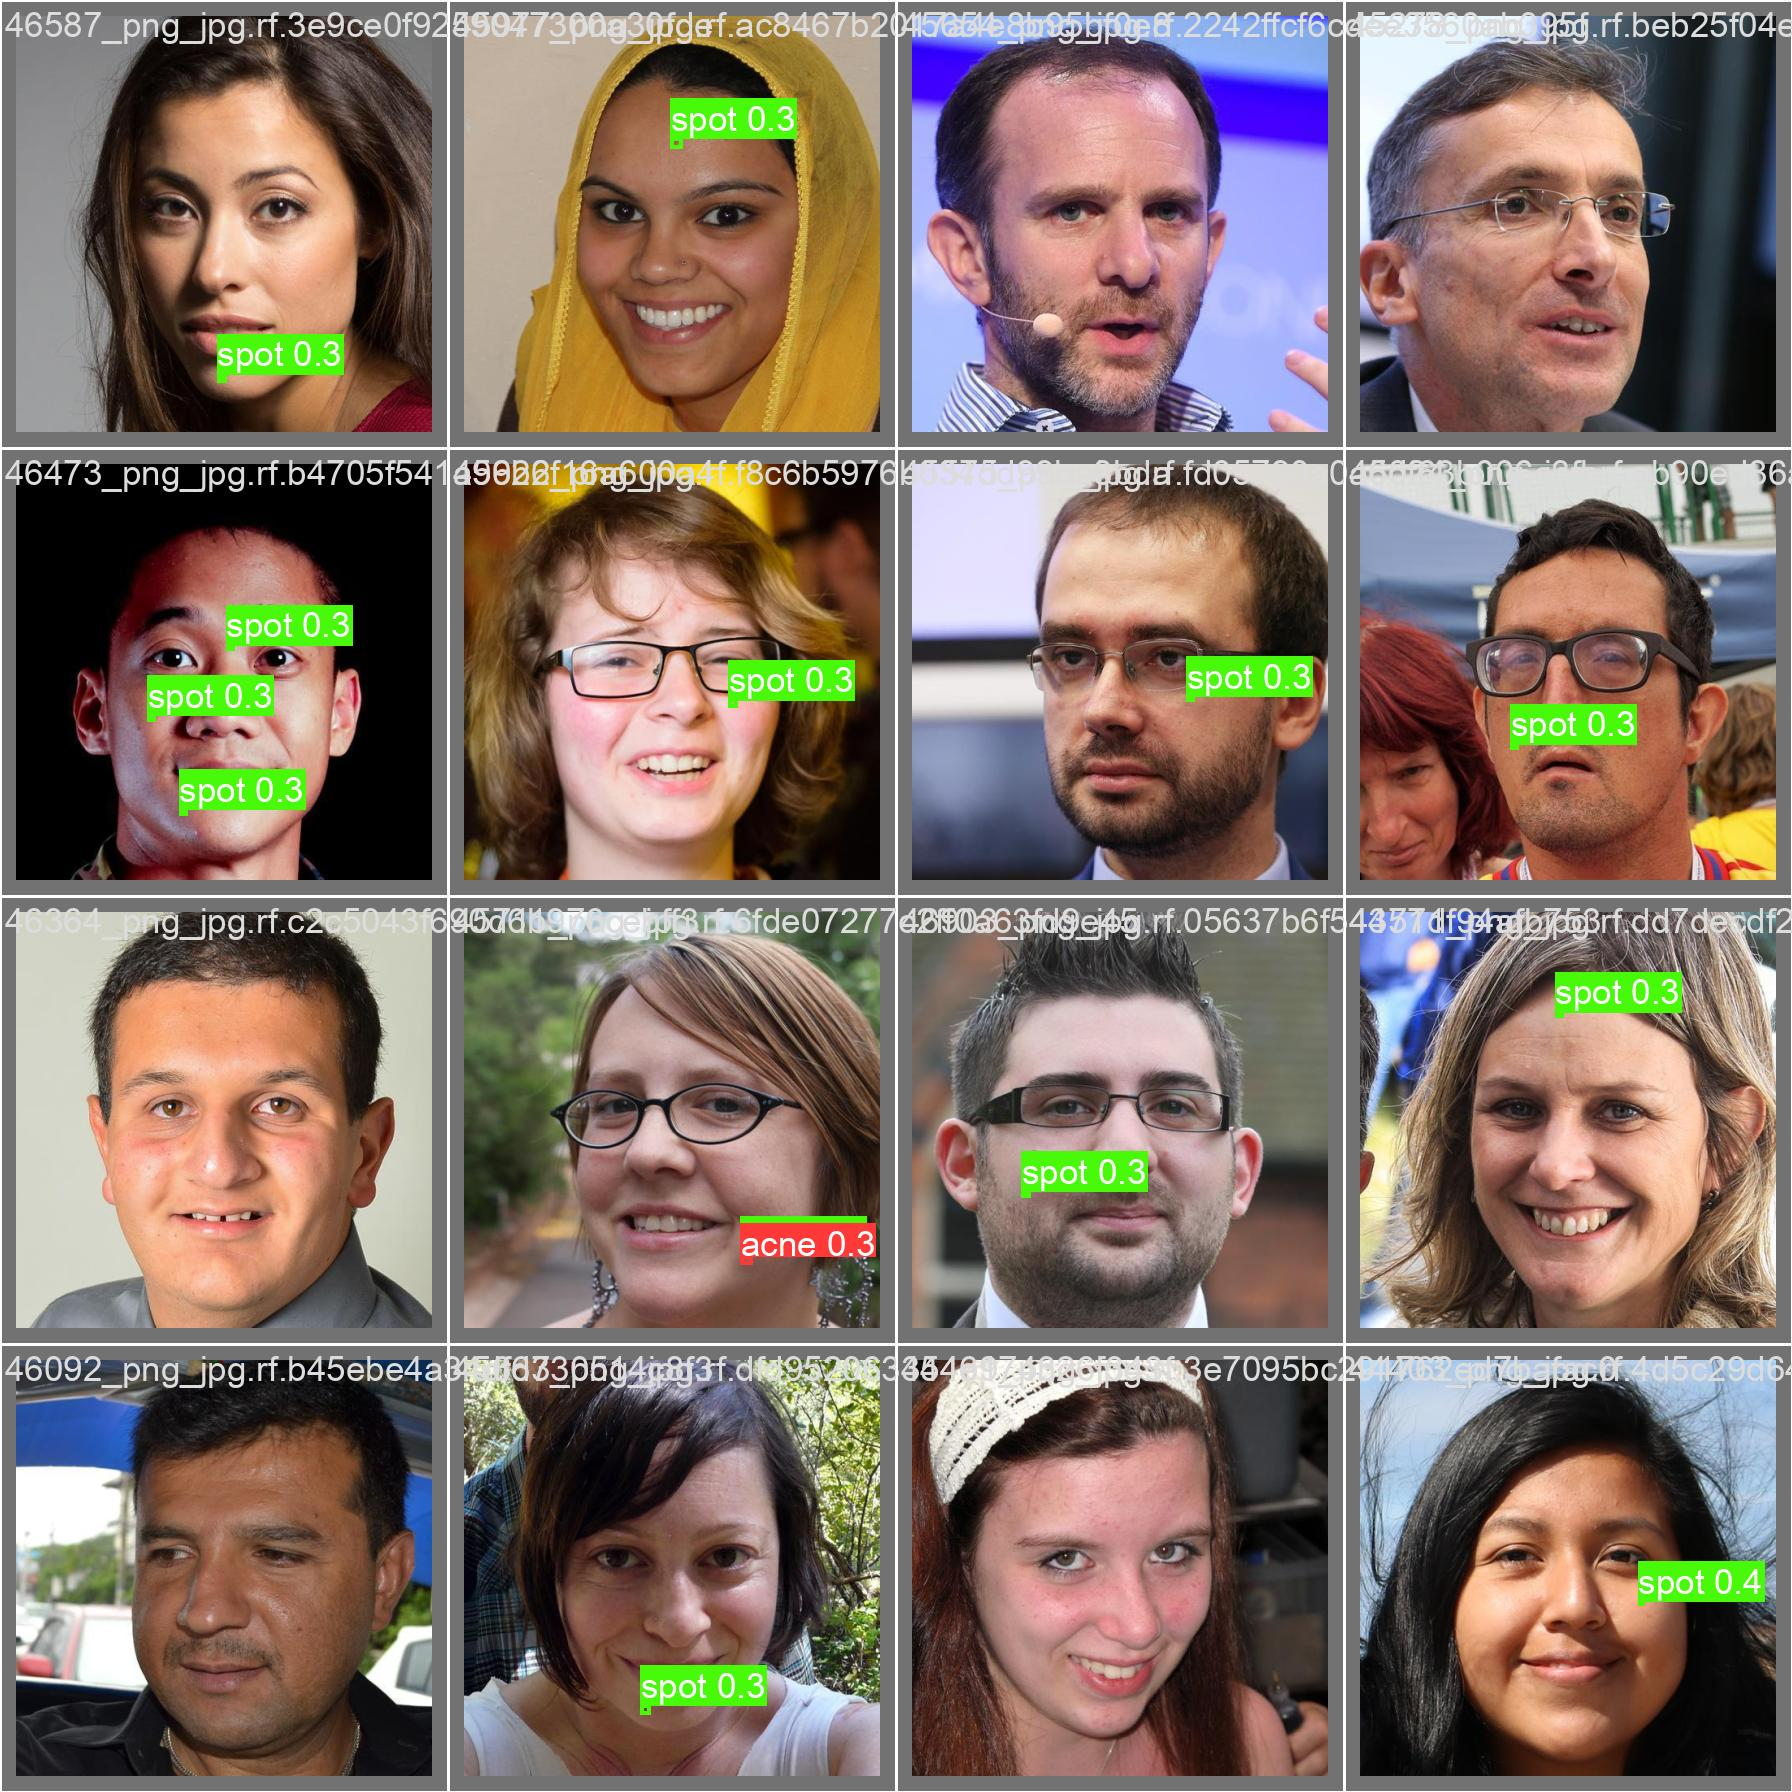

In [25]:
Image(filename='/content/yolov5/runs/train/yolov5s_results4/val_batch2_pred.jpg', width=900)

Actual:

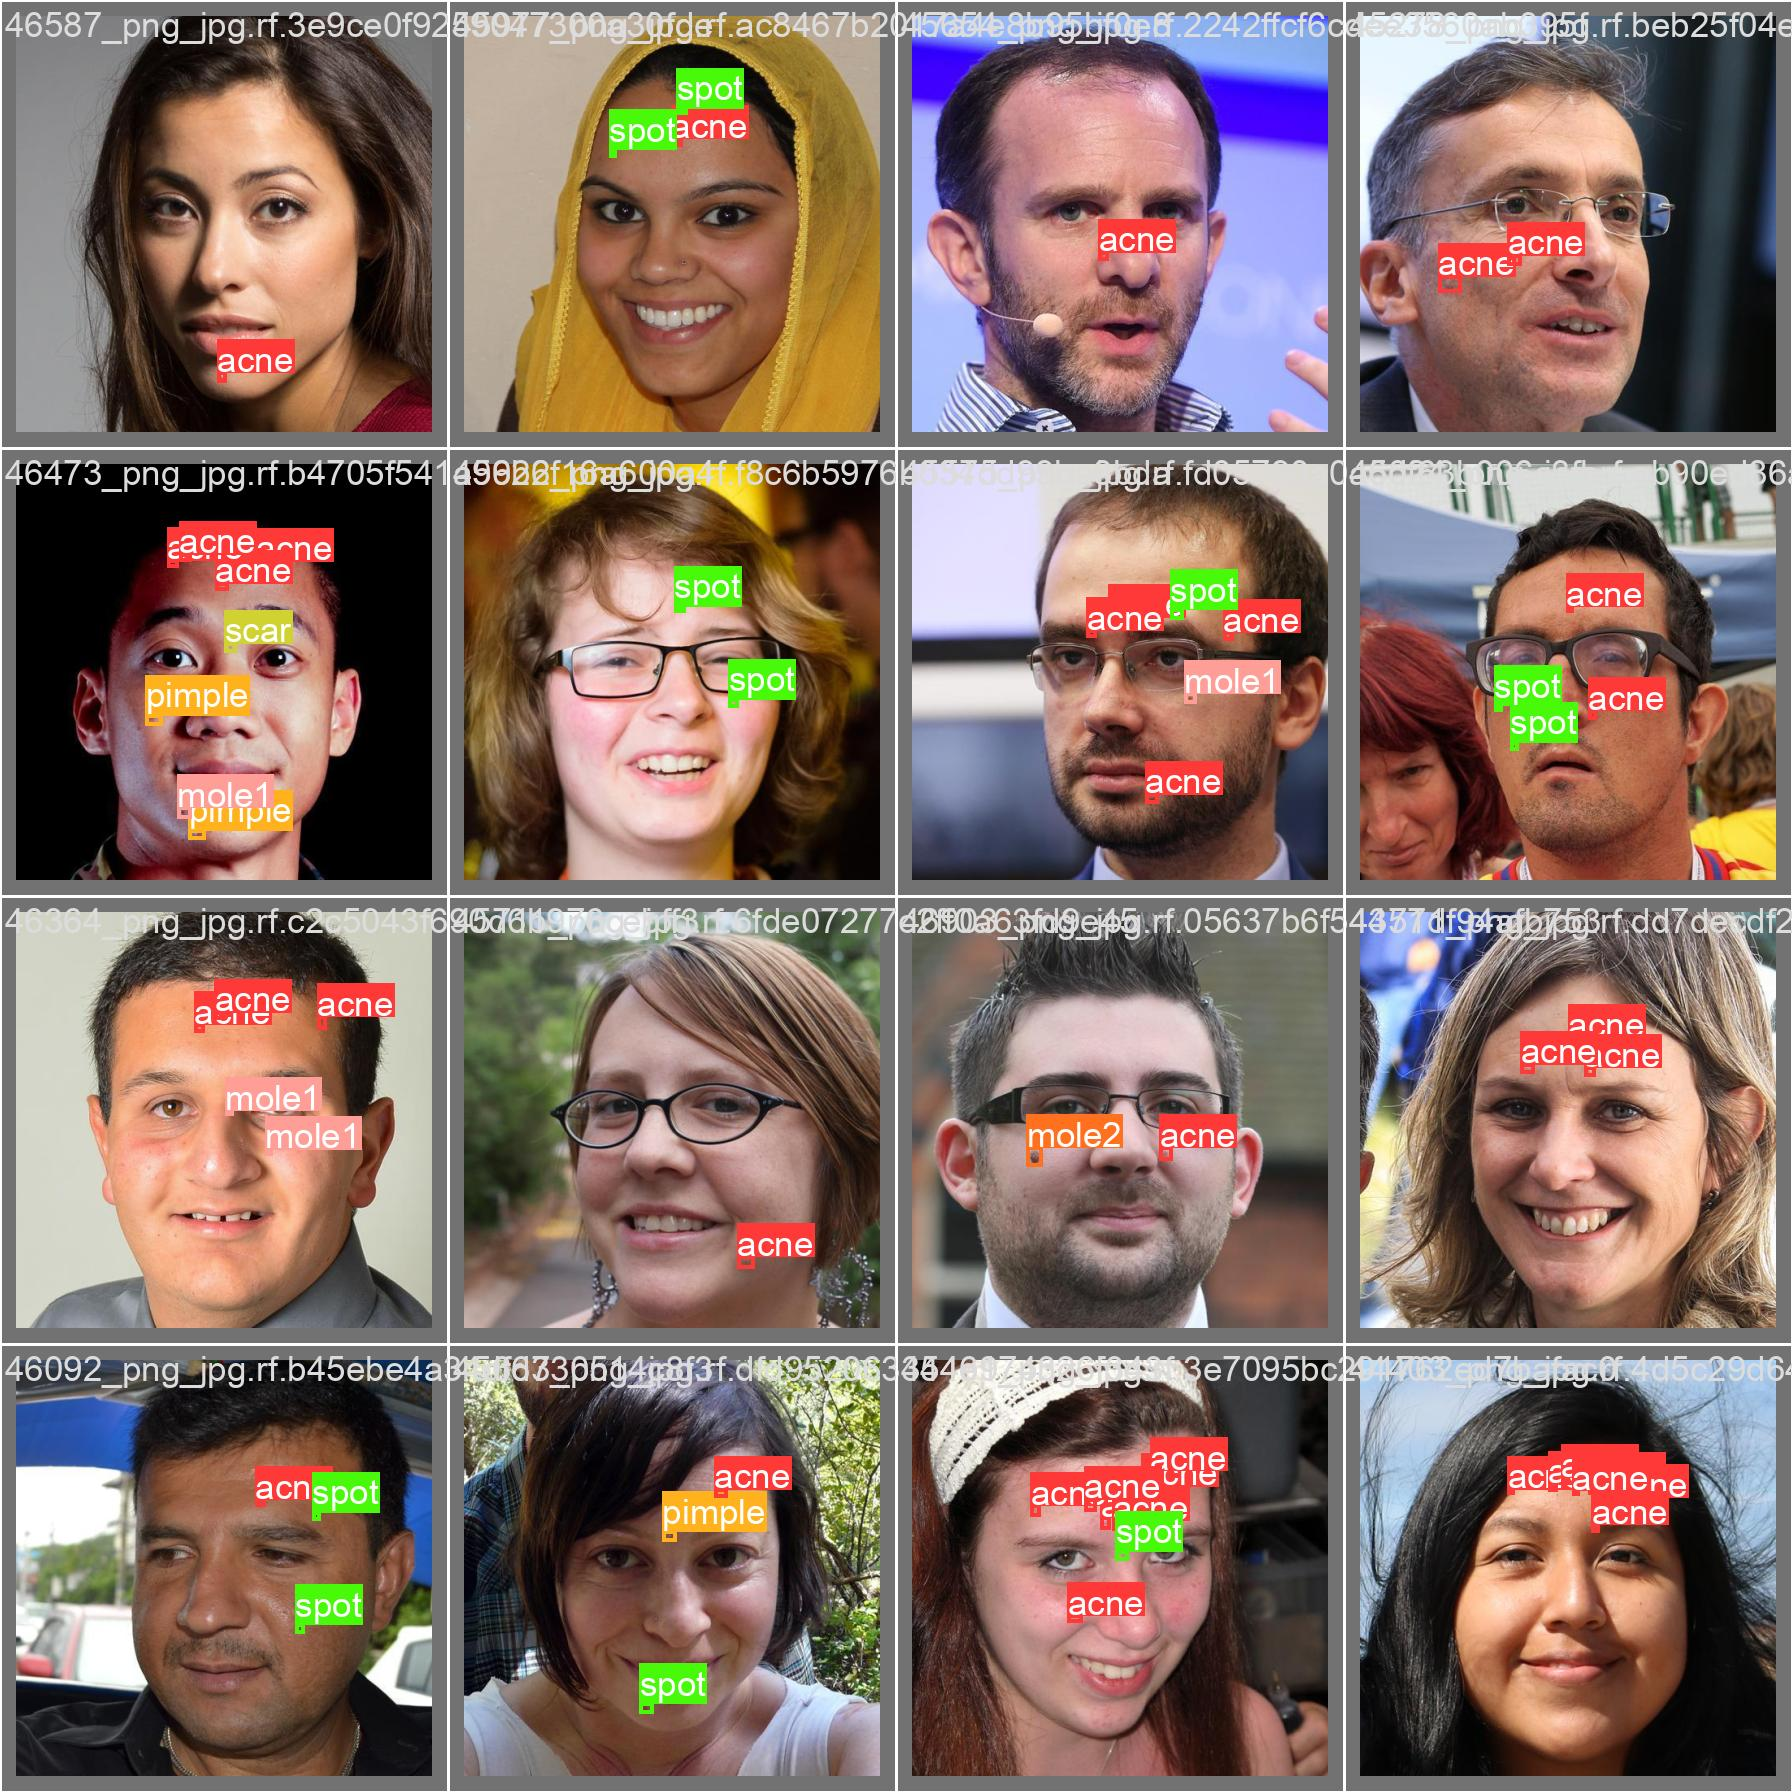

In [26]:
Image(filename='/content/yolov5/runs/train/yolov5s_results4/val_batch2_labels.jpg', width=900)

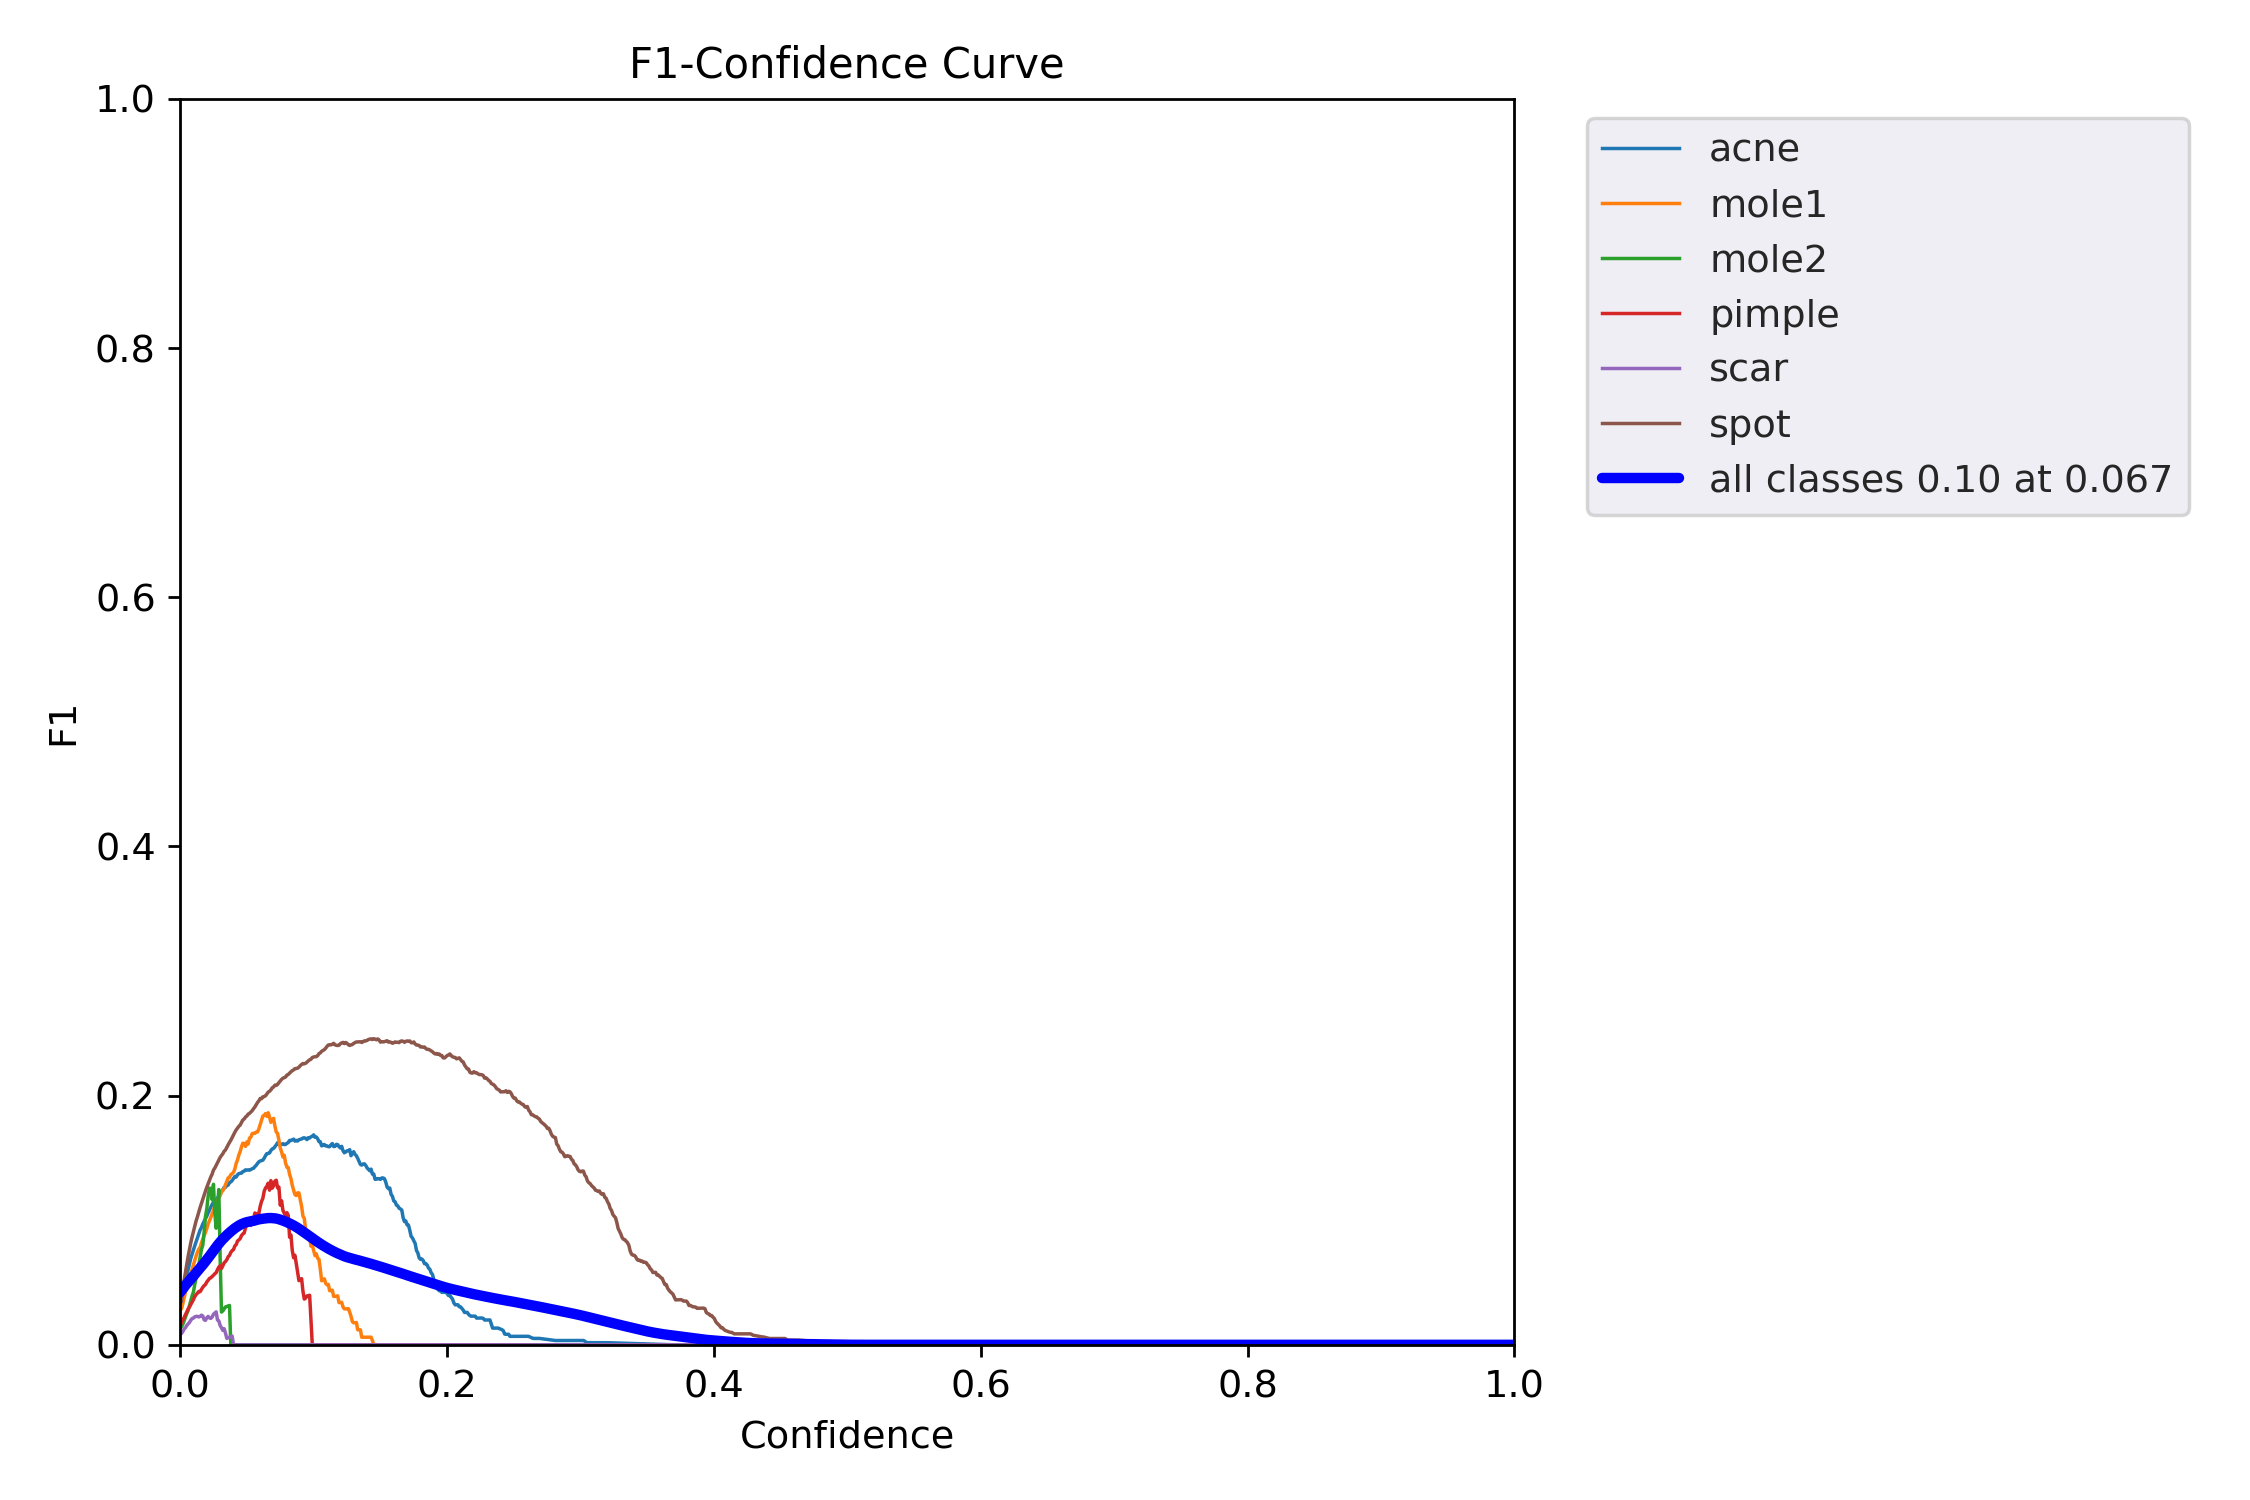

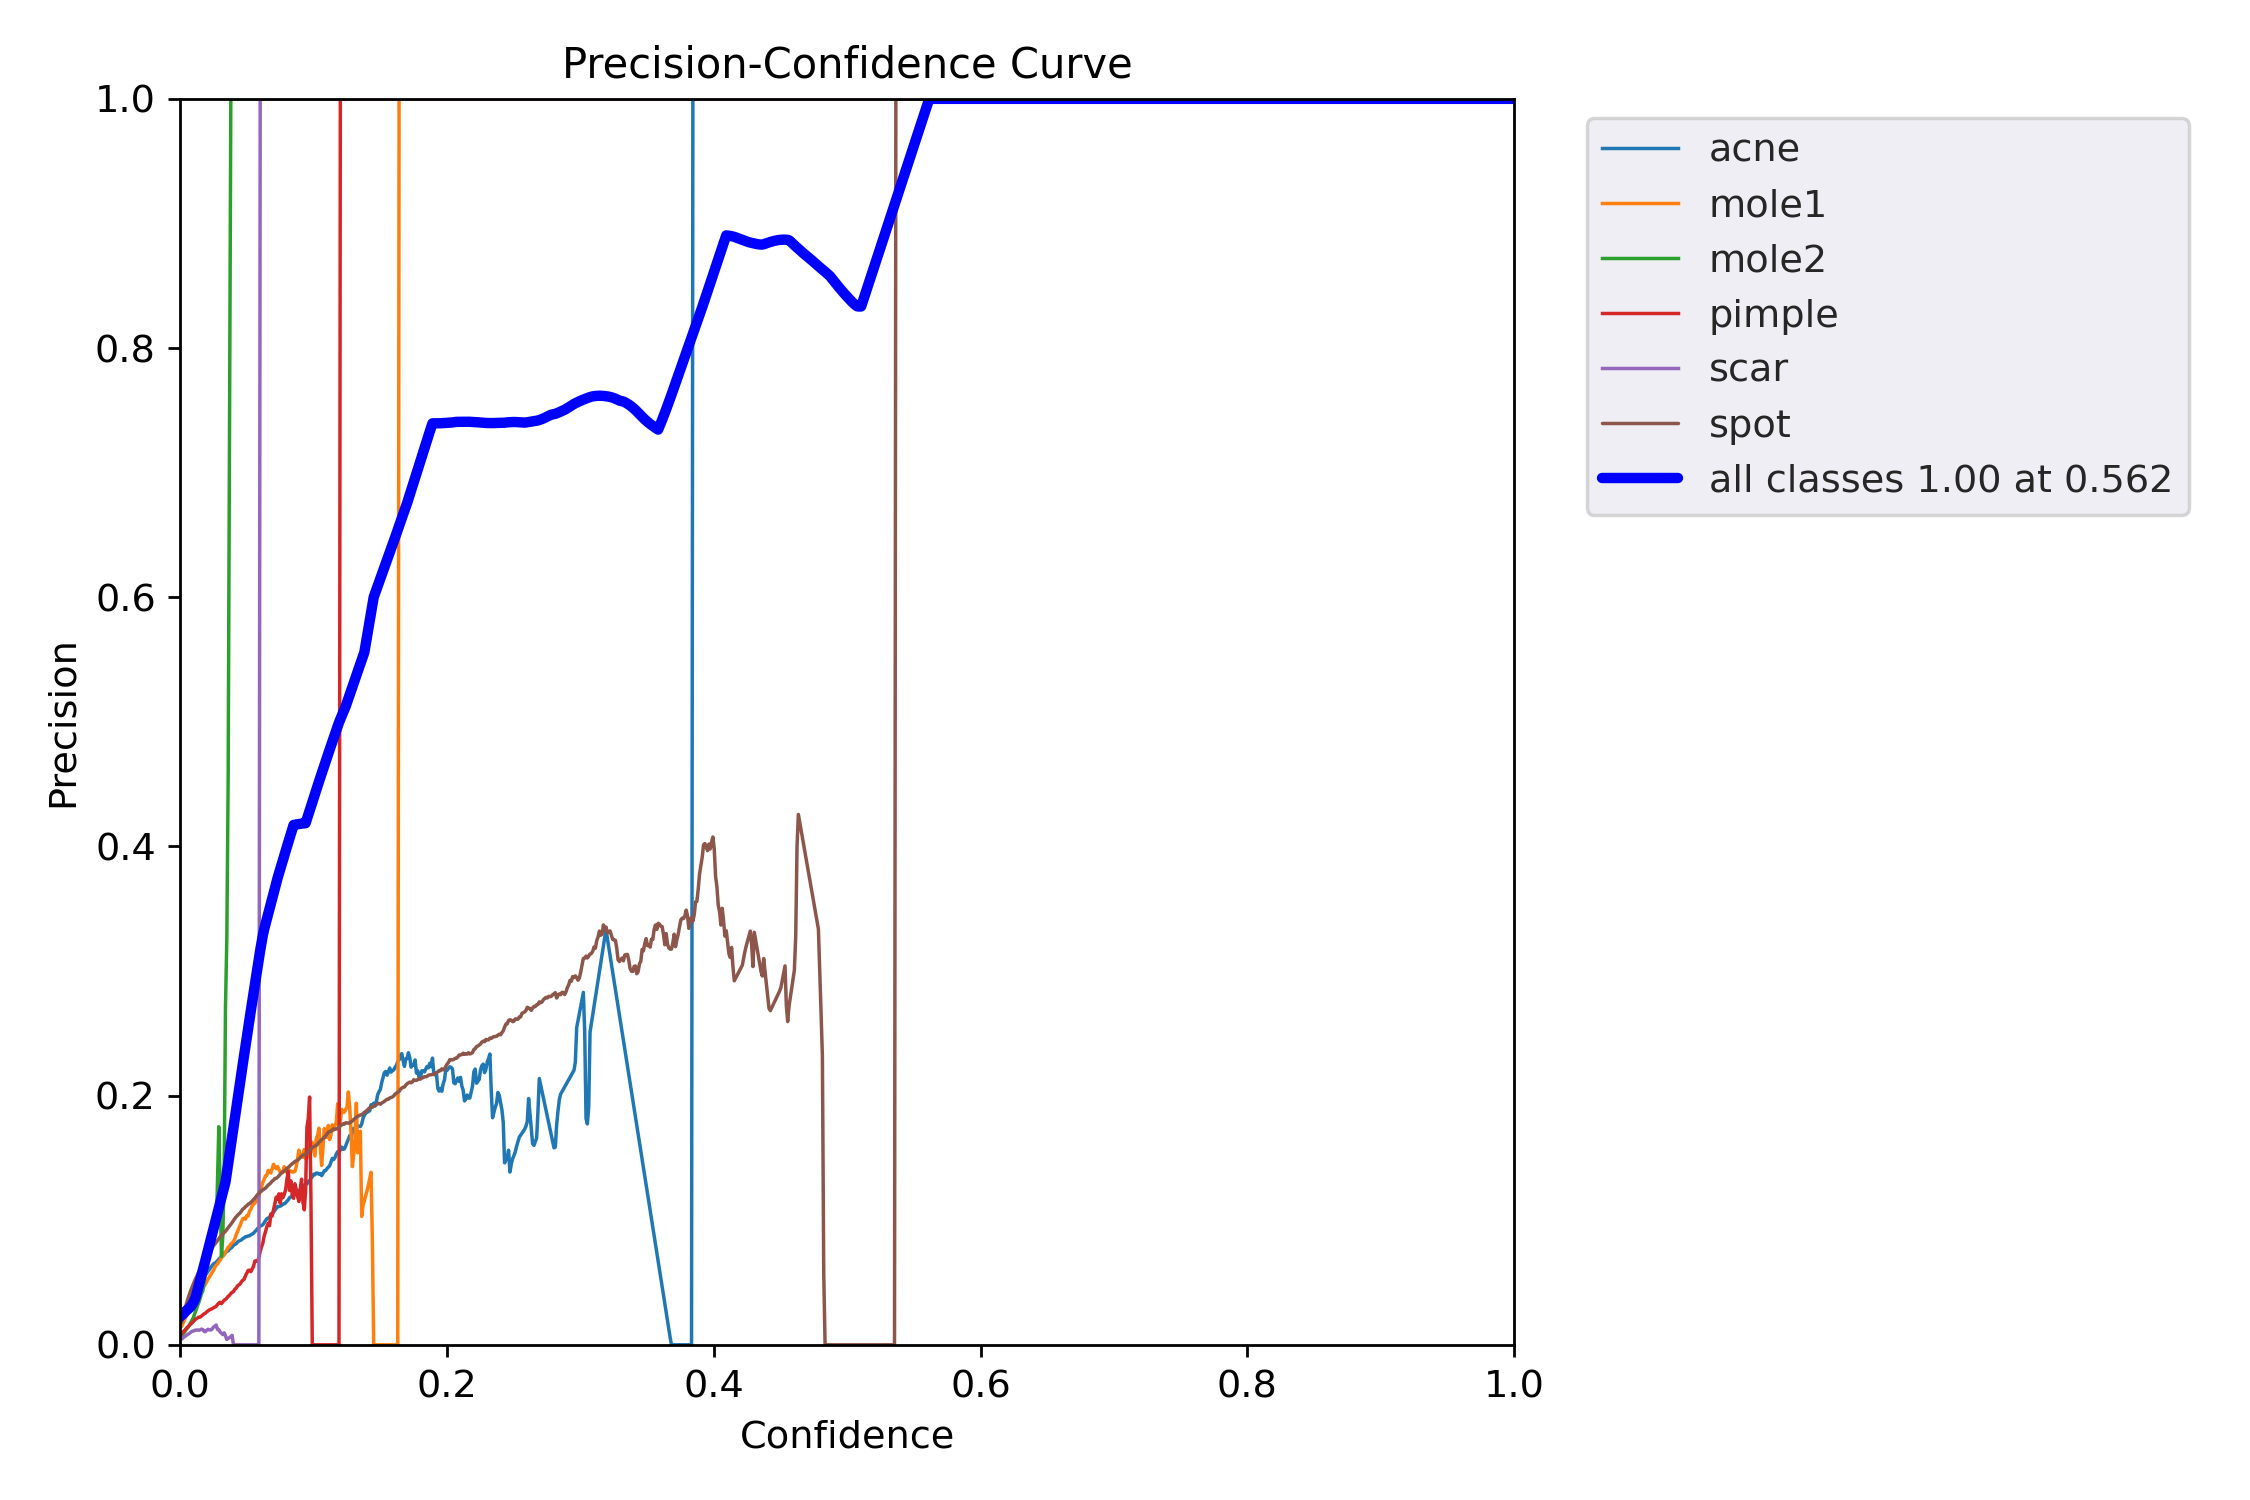

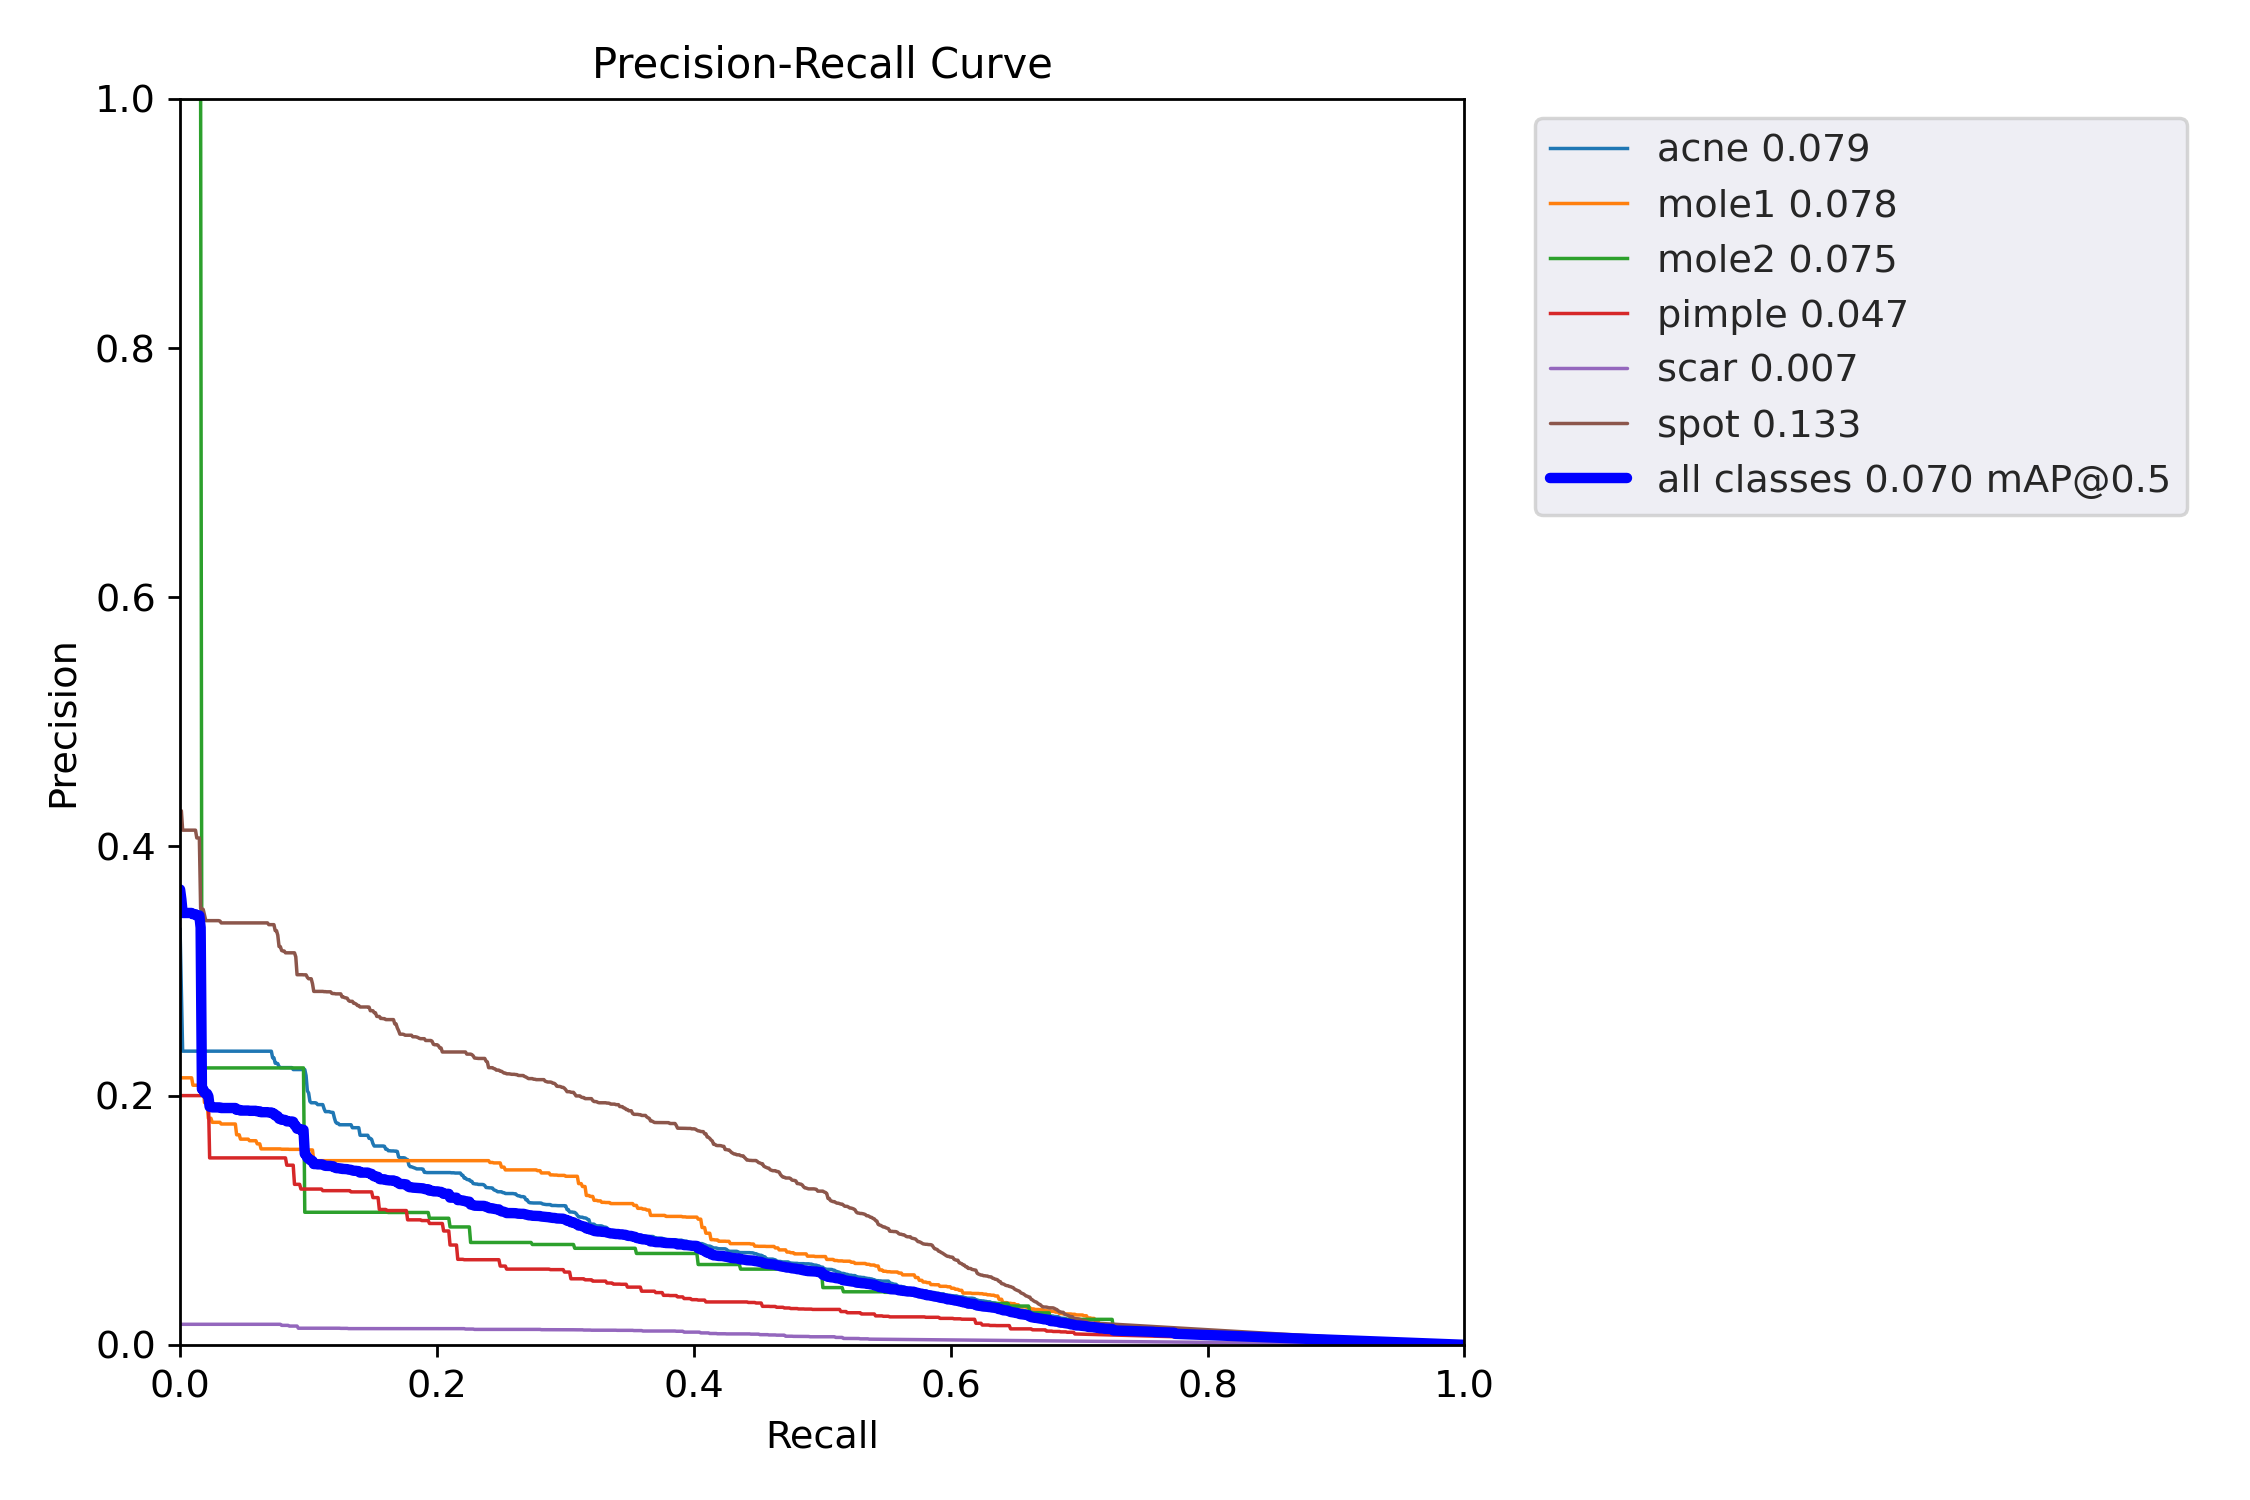

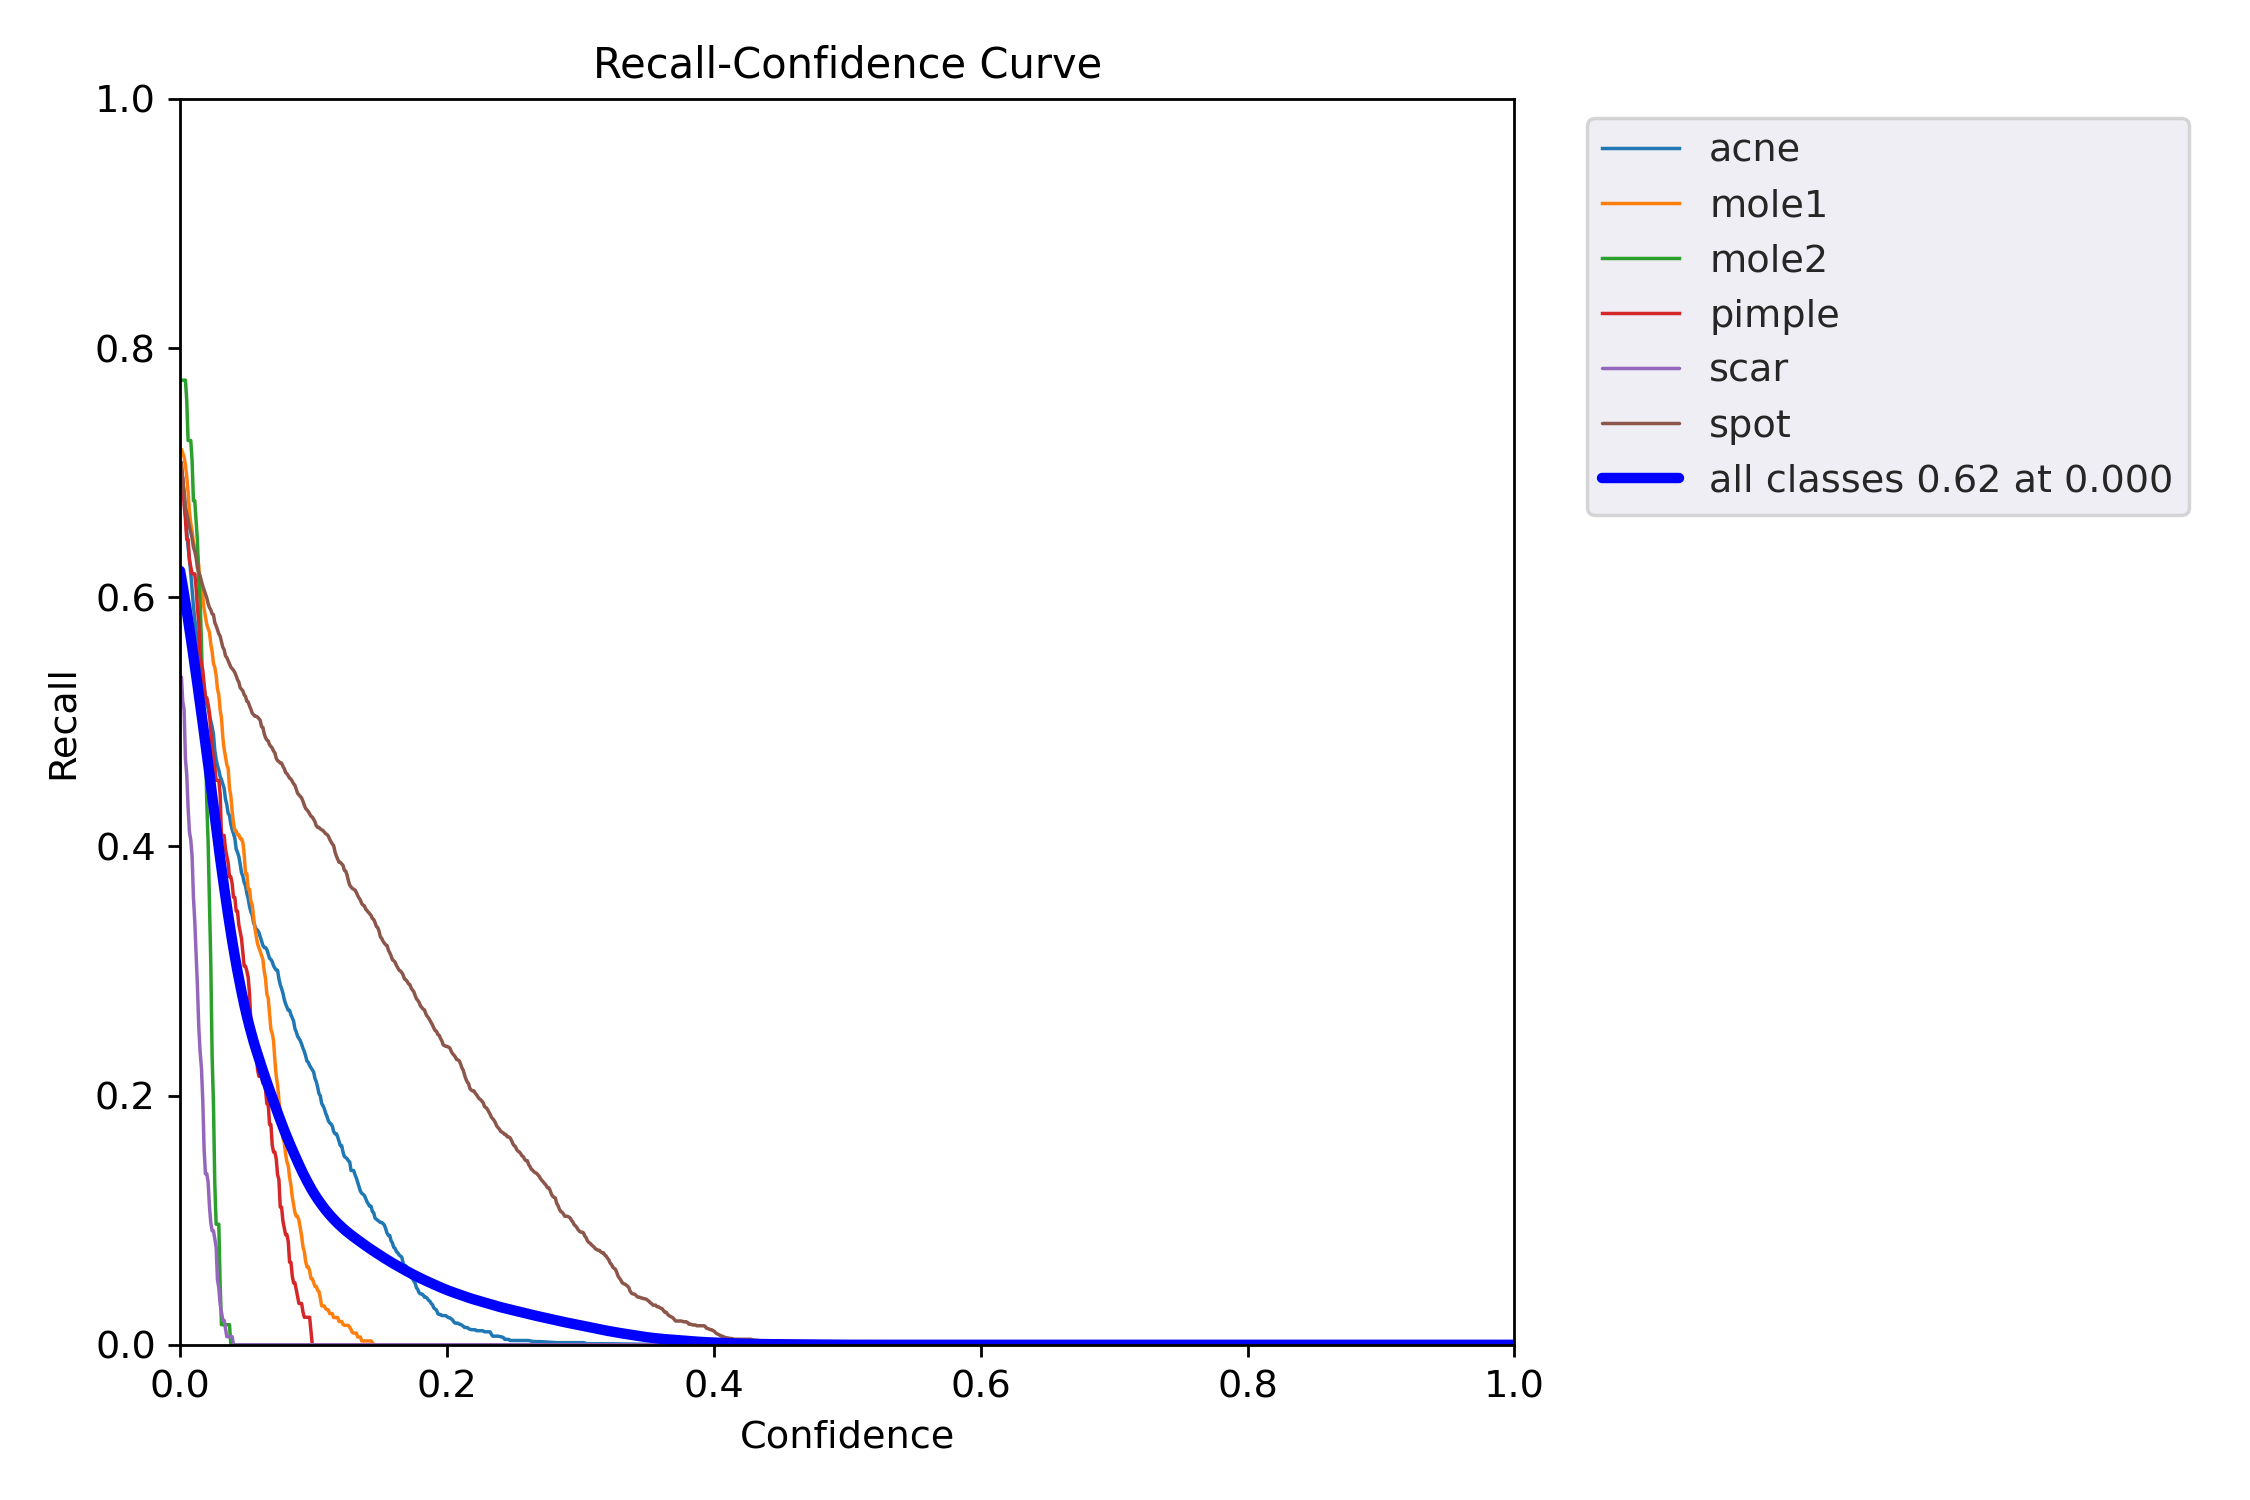

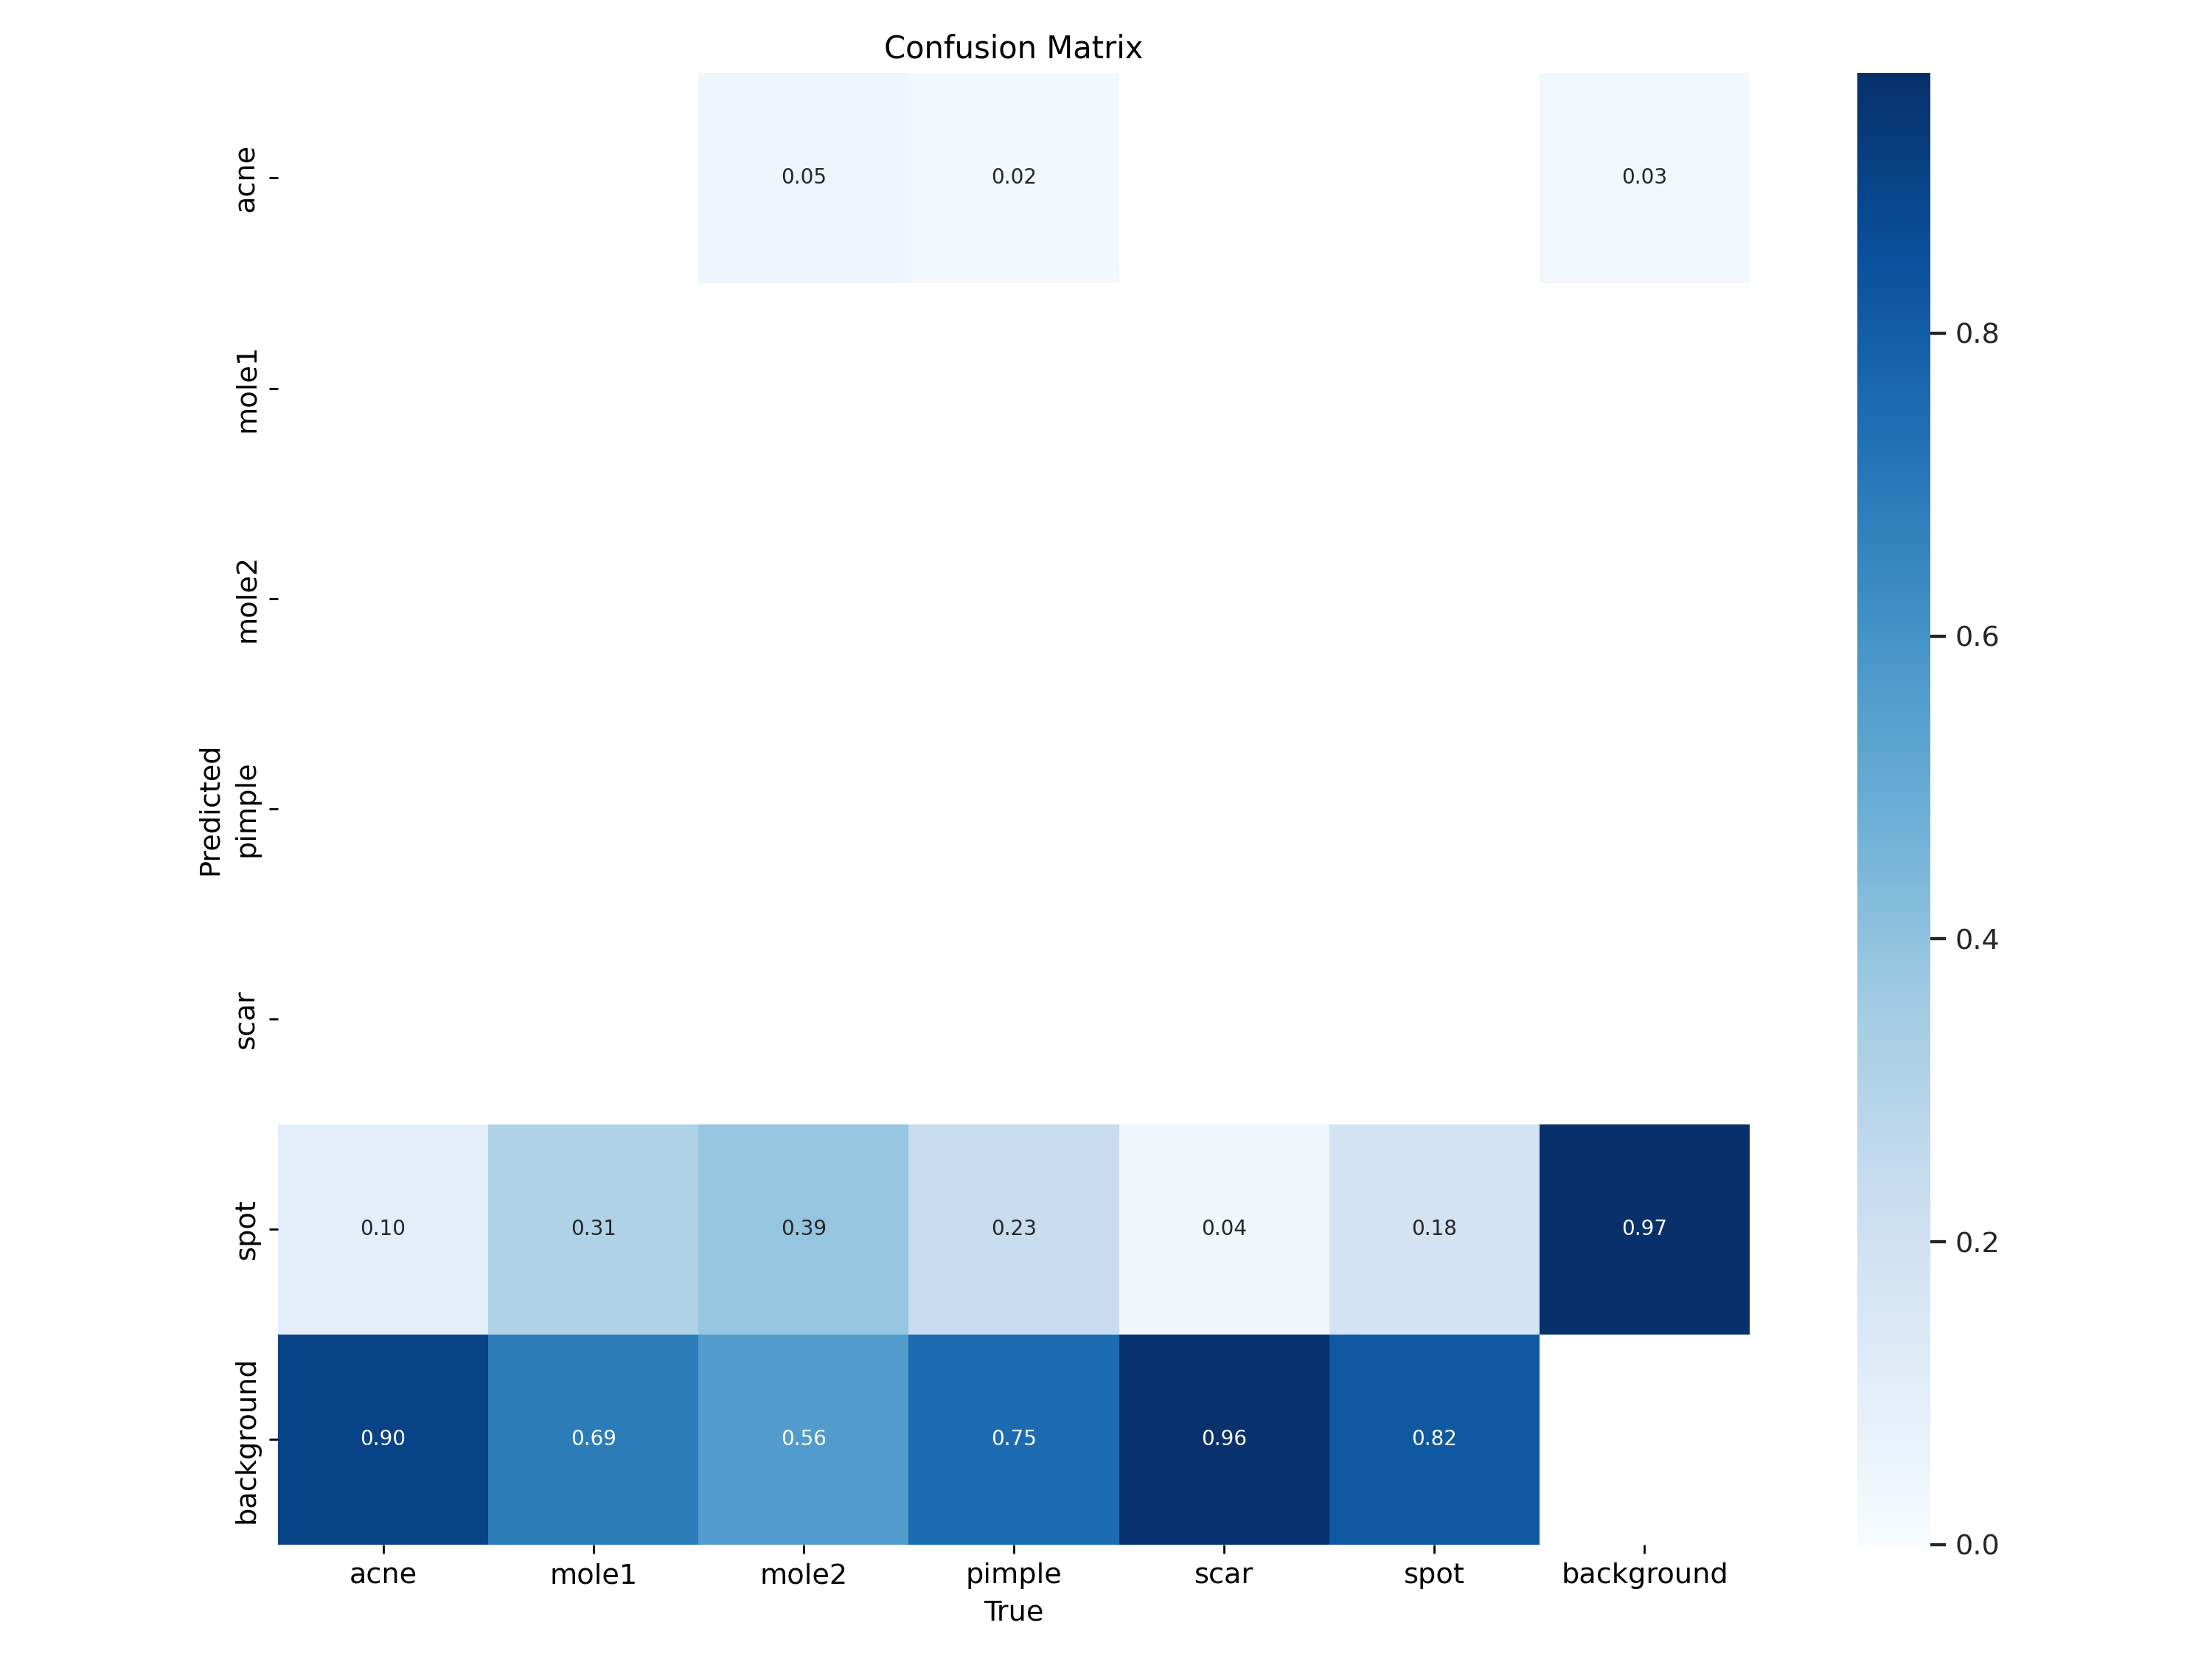

In [38]:
import os
path = '/content/yolov5/runs/train/yolov5s_results4/'
image_files = ['F1_curve.png', 'P_curve.png', 'PR_curve.png', 'R_curve.png', 'confusion_matrix.png']
for image_file in image_files:
    image_path = os.path.join(path, image_file)
    display(Image(filename=image_path,width = 500))

Pipeline:
- Extracted the dataset from roboflow
  (in yolov5 format )
- Seperated the dataset into train, validation classes for gaining the prediction
- Adjusted the path variables in .yml file & constrained hyperparameters for low training time.

Inferences:

Following defects are identified in better way in given order: spot, acne, mole, pimple

Predictions couldn't identify acne/pimple/ other classes in better way compared to spots due to:

- low epochs : 5
  Since the model is taking very high training time : around 37 minutes for a epoch, I've restricted the model to 5 epochs instead of general 20/50 range

- Low quality dataset:
  Dataset isn't preprocessed (resized ) & augmented (which reduces its robustness)
  Also the dataset lacks the diversity among the classes & annotation isn't upto the mark for some images as well

- Too small bounding box: Adding to the less amount of data, bounding box size is also too small which is making it difficult to differentiate between similar classes


Future work:

- Preprocess the dataset before hand to ensure all images are of similar shape

- Normalize the image pixels as part of pre-processing for better convergence

- Augmented the dataset by flipping, rotating, brightness, contrast ... to ensure robustness

- Increase the epochs and ensure model is being trained with GPU for faster execution

- If model predicts similar to the labels, we can evaluate using IOU & other evaluation metrics

- Mole class can be removed since it doesn't come under curable defect, instead we can add whiteheads ( manual annotation ...)